<a href="https://colab.research.google.com/github/Dan22dongwon/DeeplearningQuest/blob/main/5_%EB%AA%A8%EB%8D%B8_%EC%A0%80%EC%9E%A5%EA%B3%BC_%EC%BD%9C%EB%B0%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5-1. 들어가며
안녕하세요.

학습시킨 모델을 저장하고 관리하는 것은 모델 관리, 더 나아가 MLOps(데이터 수집부터 모델 학습, 서비스 배포까지를 포함하는 시스템)의 시작점이라고 할 수 있습니다.

오늘 내용을 잘 소화한다면 여러분이 학습시킨 여러분만의 모델을 가질 수 있게 될겁니다.




## 5-2. MNIST 딥러닝 모델 예제

딥러닝을 처음 배우는 사람들이 만나게 되는 데이터셋 중 하나인 손으로 쓴 숫자들로 이루어진 이미지 데이터셋이 MNIST 데이터셋입니다. 아주 오래된 고전 데이터셋으로서 기계 학습 분야의 학습 및 테스트에 널리 사용되죠. 우리가 사용할 MNIST는 keras.datasets에 기본으로 포함되어 있습니다.

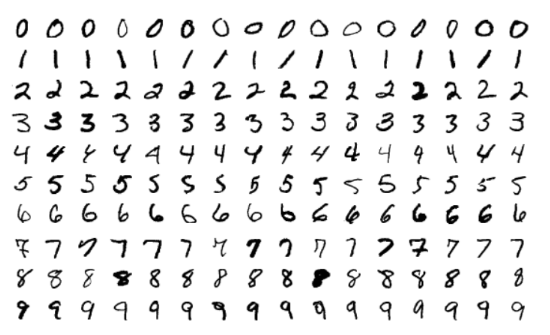


### 모듈 임포트
딥러닝을 사용하는데 필요한 라이브러리인 Tensorflow와 keras를 임포트하고, 케라스(Keras)의 모델, 레이어, 옵티마이저, 유틸을 사용할 수 있도록 models, layers, optimizer, utils를 임포트합니다.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils

### 데이터 로드 및 전처리
이제 우리가 사용할 MNIST 데이터셋을 로드하기 위해서 케라스의 데이터셋에 내장되어 있는 tensorflow.keras.datasets.mnist를 임포트합니다. 그리고 ```train_test_split()``` 함수를 이용해 학습용 데이터인 ```x_train_full```와 ```y_train_full```를 나누어서 70%는 학습용 데이터인 ```x_train```와 ```y_train```으로 사용하고, 30%는 검증 데이터인 ```x_val```와 ```y_val```로 사용합니다.

데이터셋이 어떻게 구성되었는지 출력해보면, 전체 60,000개의 학습 데이터 중에서 70%인 42,000개가 학습용 데이터로 나눠지고, 30%인 18,000개가 검증용 데이터로 나눠졌으며, 테스트용으로는 10,000개가 주어진 것을 알 수 있습니다.

In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape}  레이블: {y_train_full.shape}")
print(f"학습용 데이터: {x_train.shape}  레이블: {y_train.shape}")
print(f"검증용 데이터: {x_val.shape}  레이블: {y_val.shape}")
print(f"테스트용 데이터: {x_test.shape}  레이블: {y_test.shape}")

### 데이터 로드 및 전처리
이제 우리가 사용할 MNIST 데이터셋을 로드하기 위해서 케라스의 데이터셋에 내장되어 있는 tensorflow.keras.datasets.mnist를 임포트합니다. 그리고 train_test_split() 함수를 이용해 학습용 데이터인 x_train_full와 y_train_full를 나누어서 70%는 학습용 데이터인 x_train와 y_train으로 사용하고, 30%는 검증 데이터인 x_val와 y_val로 사용합니다.

데이터셋이 어떻게 구성되었는지 출력해보면, 전체 60,000개의 학습 데이터 중에서 70%인 42,000개가 학습용 데이터로 나눠지고, 30%인 18,000개가 검증용 데이터로 나눠졌으며, 테스트용으로는 10,000개가 주어진 것을 알 수 있습니다.

In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape}  레이블: {y_train_full.shape}")
print(f"학습용 데이터: {x_train.shape}  레이블: {y_train.shape}")
print(f"검증용 데이터: {x_val.shape}  레이블: {y_val.shape}")
print(f"테스트용 데이터: {x_test.shape}  레이블: {y_test.shape}")

MNIST 데이터셋에 실제 숫자 이미지가 어떻게 구성되어 있는지 60,000개 중에서 6개만 랜덤으로 x_train_full과 y_train_full에서 추출하여 표시해보도록 하겠습니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

num_sample = 6
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_idxs):
  img = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.axis('off')
  plt.title(f'Index: {idx}, Label: {label}')
  plt.imshow(img)

MNIST의 학습용 데이터가 실제 값으로는 어떻게 구성되어있는지 출력을 해보면, y_train의 0번째는 4라는 값이 저장되어 있는걸 알 수 있고, x_train의 0번째에는 숫자 4에 대한 이미지를 0~255 사이의 값으로 표현하고 있음을 알 수 있습니다.

In [ ]:
print(y_train[0])

In [ ]:
img = x_train[0, :]
plt.axis('off')
plt.imshow(img)

In [ ]:
print(x_train[0])

MNIST 데이터셋을 가지고 본격적으로 딥러닝 모델에 사용하기 위해서는 전처리 과정이 필요합니다. 본 예제에서는 간단한 전처리만 사용해서 ```x_train```,``` x_val`` 그리고 ```x_test```의 값들을 255로 나누어줍니다. 이미지의 픽셀이 표현하는 값의 범위가 0 ~ 255이기 때문에 최대값인 255로 나누어주면, 값이 0 ~ 1 사이의 범위로 스케일링되어 학습에 용이해집니다.


```y_train```, ```y_val```, 그리고```y_test```의 경우에는 0부터 9까지의 숫자를 나타내는 레이블이기 때문에 총 10개의 값을 가지는 범주형입니다. 따라서 ```utils```.```to_categorical```을 이용해 원-핫 인코딩을 수행합니다. 즉 정답에는 1을, 나머지의 값은 0을 부여합니다.

In [ ]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

print(y_train[0])
print(y_val[0])
print(y_test[0])

### 모델 구성
딥러닝 모델 구성을 위해서 ```Sequential()``` 함수를 이용해 순차적으로 레이어를 구성합니다. 먼저 MNIST 데이터셋의 숫자 이미지가 28 x 28 사이즈를 사용하므로 입력 객체로 keras.Input를 사용할 때, shape을 (28, 28)로 지정해줍니다. 그리고 1차원으로 쭉 펼쳐주는 layers.Flatten 레이어를 사용하여 입력 데이터 모양이 2차원인 28 x 28 크기를 1차원으로 784 크기를 갖도록 변형해줍니다.

그 이후 레이어로 layers.Dense를 여러겹 사용하여 유닛수를 100, 64, 32, 10으로 4겹 쌓아주고, 활성화 함수로 relu를 사용합니다. 여기서 MNIST의 숫자가 0부터 9까지 총 10개 이므로 마지막 레이어에서는 전체 카테고리의 수인 10을 유닛수로 지정하고, 활성화 함수는 softmax를 사용하여 각 카테고리별 확률 값을 구합니다.

In [ ]:
model = models.Sequential()
model.add(keras.Input(shape=(28, 28), name='input'))
model.add(layers.Flatten(input_shape=[28, 28], name='flatten'))
model.add(layers.Dense(100, activation='relu', name='dense1'))
model.add(layers.Dense(64, activation='relu', name='dense2'))
model.add(layers.Dense(32, activation='relu', name='dense3'))
model.add(layers.Dense(10, activation='softmax', name='output'))
model.summary()

생성한 모델의 구성을 그림을 통해 확인합니다.

In [ ]:
utils.plot_model(model)

모델의 구성을 각 레이어의 모양까지 함께 살펴보도록 합니다.

In [ ]:
utils.plot_model(model, show_shapes=True)

### 모델 컴파일 및 학습
구성한 모델에 손실 함수로는 다중 분류로 클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용하는 ```categorical_crossentropy```를 지정하고, 옵티마이저는 가장 기본적인 ```sgd```을 지정합니다. 그리고 분류에 대한 성능을 확인하기 위한 지표로 ```accuracy```를 지정합니다.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

이제 본격적으로 딥러닝 모델을 학습하기 위해 fit을 실행시키는데, 이때 학습에 사용되는 데이터로 ```x_train```과 ```y_train```을 지정하고, 학습을 반복하는 에폭 수(epochs)는 40으로 지정하며, 배치 사이즈(batch_size)는 128로 지정합니다. 그리고 검증을 위해서 나누었던 데이터로 ```x_val```와 ```y_val```을 지정해줍니다.

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

모델이 학습을 진행하면서 각 에폭마다 지표 결과들을 history로 저장을 합니다. 저장된 형태를 보면 loss, accuracy, val_loss, val_accuracy로 구분되는걸 알 수 있습니다.

In [ ]:
history.history.keys()

```history```에 저장된 결과 값들이 에폭이 진행되면서 변화되는 추이를 살펴보기 위해서 시각화합니다.

첫 번째 차트에서는 loss와 ```val_loss```를 함께 보여주고, 두 번째 차트에서는 accuracy와 ```val_accuracy```를 함께 보여줍니다

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측
학습된 모델의 평가를 위해서 x_test와 y_test를 대상으로 evaluate() 함수를 동작시킵니다.

In [ ]:
model.evaluate(x_test, y_test)

학습된 모델의 예측을 위해 ```x_test```를 넣고, 그에 대한 예측 결과를 받아서 0번째 결과만 확인을 해보면, 최종 레이어인 유닛 수 10개의 ```softmax```를 활성화 함수로 통과한 결과인 것을 알 수 있습니다.

In [ ]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)
print(pred_ys[0])

결과값 중에서 가장 큰 수가 있는 위치값을 ```np.argmax()```를 통해서 구하고, 예측한 레이블 값 ```arg_pred_y[0]```과 실제 숫자 이미지인 ```x_test[0]```를 출력해봅니다.

In [ ]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.title(f'Predicted label: {arg_pred_y[0]}')
plt.imshow(x_test[0])
plt.show()

모델이 제대로 분류를 수행했는지 알기 위해서 사이킷런(Scikit-Learn)에 포함된 classification_report를 임포트해서 각종 지표들을 한눈에 살펴봅니다.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

각 레이블 별로 분류가 얼마나 잘 수행되었는지 한눈에 살펴볼 수 있도록 혼동 행렬(Confusion Matrix)을 이용해 시각화합니다.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Q. 위 결과를 보았을 때 모델이 어떤 숫자를 가장 맞추기 어려워했고 어떤 숫자와 헷갈려 하나요?

:4와 9 , 7과 2 를 많이 헷갈려 함

5-3. 모델 저장과 로드

모델을 열심히 학습시키고 저장을 안한다면 다시 처음부터 학습을 해야합니다. 즉, 어느 정도 학습이 되었다면 추후에 모델을 사용하기 위해서 저장할 필요가 있습니다. 모델을 저장할 때는 ```save()``` 함수를 사용하여 쉽게 저장할 수 있고, 다시 모델을 불러올 때는 ```load_model()``` 함수를 사용하면 됩니다.

모델을 저장하고 로드하는 것에서 중요한 점은 모델 생성 시에 Sequencial API 또는 Functional API를 사용한 경우에는 모델의 저장 및 로드가 가능하지만 Subclassing API 방식은 사용할 수가 없습니다. Subclassing API 방식은 ```save_weights()```와 ```load_weights()```를 이용해 모델의 파라미터만 저장 및 로드하는 것이 가능합니다.

만약 JSON 형식으로 모델을 저장하려면 ```to_json()```를 사용하여 가능하고, JSON 파일로부터 모델을 로드하려면 ```model_from_json()```을 사용하면 됩니다. 그 밖에도 YAML로 직렬화하여 저장할 경우 ```to_yaml()```를 사용하고, ```model_from_yaml()```를 사용하여 로드하면 됩니다.

실습을 통해 모델 저장과 로드를 해봅시다.

mnist_model.h5라는 이름으로 모델을 저장합니다.

In [ ]:
model.save('mnist_model.h5')

```mnist_model.h5```라는 이름의 모델을 로드하여 가져옵니다.

In [ ]:
loaded_model = models.load_model('mnist_model.h5')
loaded_model.summary()

로드한 모델을 이용하여 예측하는 것이 가능합니다.

In [ ]:
pred_ys2 = loaded_model.predict(x_test)
print(pred_ys2.shape)
print(pred_ys2[0])

마찬가지로 로드한 모델이 예측한 결과값을 시각화한 결과입니다.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


#예측값 시각화하기
class_probabilities = np.max(pred_ys2, axis=1)

# 클래스별 평균 예측 확률 계산
class_probabilities = np.mean(pred_ys2, axis=0)

# 클래스 이름 정의
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# 예측값 시각화하기
plt.figure(figsize=(28, 28))
plt.bar(class_names, class_probabilities)
plt.xlabel('Class')
plt.ylabel('Mean Probability')
plt.title('Mean Predicted Probabilities')
plt.show()

Q. to_json() 함수를 이용해 모델을 저장해보고 다시 불러서 결과를 확인해보세요. 결과가 같은가요, 다른가요?

In [ ]:
# 위에서 학습시킨 model의 구조를 json 형식으로 model_json에 저장합니다.
model_json = model.to_json()

# json으로 저장한 모델을 읽어옵니다.
loaded_model = keras.models.model_from_json(model_json)

predictions = loaded_model.predict(x_test)
print(predictions.shape)
print(predictions[0])

### 5-4. 콜백 (Callbacks)

모델을 ```fit()``` 함수를 통해 학습시키는 동안 ```callbacks``` 매개변수를 사용하여 학습 시작이나 끝에 호출할 객체 리스트를 여러 개 지정할 수 있습니다. 콜백의 대표적인 예로는 ```ModelCheckpoin```t, ```EarlyStopping```, ```LearningRateScheduler```, ```Tensorboard```가 있습니다.

먼저 ```tensorflow.keras.callbacks```를 임포트하여 줍니다.

In [ ]:
from tensorflow.keras import callbacks

### odelCheckpoint
```tf.keras.callbacks.ModelCheckpoint```

: 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용합니다.

In [ ]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[check_point_cb])

최상의 모델만을 저장하는 옵션으로 ```save_best_only=True```를 지정합니다.


In [ ]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

### EarlyStopping

```tf.keras.callbacks.EarlyStopping```
: 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용합니다.

일정 ```patience``` 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈추게 됩니다. 모델이 향상되지 않으면 학습이 자동으로 중지되므로, ```epochs``` 숫자를 크게 해도 무방합니다. 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요가 없습니다.

In [ ]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

### LearningRateScheduler
```tf.keras.callbacks.LearningRateSchduler```
: 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용합니다.

에폭 수가 10 미만일 경우는 학습률을 그대로 하고, 10 이상이 되면 -0.1%씩 감소시키는 코드입니다.

In [ ]:
def scheduler(epoch, learning_rate):
  if epoch < 10:
    return learning_rate
  else:
    return learning_rate * tf.math.exp(-0.1)

In [ ]:
round(model.optimizer.lr.numpy(), 5)

In [ ]:
lr_scheduler_cb = callbacks.LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_scheduler_cb], verbose=0)

round(model.optimizer.lr.numpy(), 5)

### Tensorboard
```tf.keras.callbacks.TensorBoard```

: 모델의 경과를 모니터링할 때 사용합니다.

텐서보드를 이용하여 학습과정을 모니터링하기 위해서는 logs 폴더를 만들고, 학습이 진행되는 동안 로그 파일을 생성합니다. 텐서보드에는 효율적인 모니터링을 위해서 여러가지 기능들을 제공하고 있습니다.

In [ ]:
log_dir = './logs'
tensor_board_cb = [callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)]
model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val),
          epochs=30, callbacks=tensor_board_cb)

아래 코드를 지금 여러분이 웹을 통해 이용하고 있는 LMS 컨테이너 내부에서 동작시킬 경우 결과가 보이지 않을 수 있습니다.

로컬PC나 colab 등의 환경에서 위의 코드를 그대로 구동해 봅시다.

로컬PC나 colab 등의 환경에서 위의 코드를 그대로 구동한다면 다음과 같은 tensorboard 결과를 확인하실 수 있습니다.


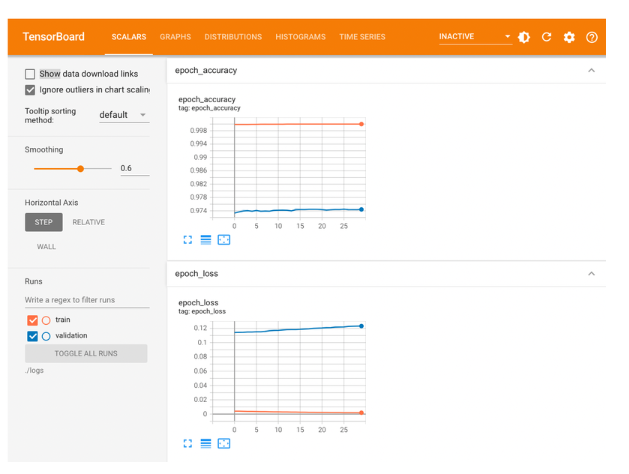



In [ ]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

### 5-5. 마무리하며
종합퀴즈

오늘 배운 내용을 문제를 풀어보면서 복습하도록 하겠습니다.

@. Keras에서 모델을 저장하는 파일형식은 크게 3가지가 있습니다. 어떤건지 설명하고 해당 방식으로 저장하려면 어떻게 작성하는지 코드까지 작성해주세요.

:
```
.h5 파일 => model.save('model.h5')
json 파일 => model.to_json()
yaml 파일 => model.to_yaml()
```

참고사항 사실 .h5파일은 TensorFlow 1.X버전부터 사용했던 저장방식입니다. 현재 TensorFlow 2.X 버전에서는 .tf파일을 선호하고 있으며 Keras의 경우 최신 업데이트를 진행해 .keras파일로 저장가능합니다. 그럼에도 아직까지 .h5파일을 범용적으로 사용하고 있어 이번 노드에서는 .h5파일을 소개합니다. (.tf 나 .keras로 파일 저장하는 방식은 .h5파일과 방식이 동일합니다)


In [ ]:
# 기존에 사용했던 mnist의 데이터들을 활용해서 모델에 checkpoint를 만들고 Earlystopping을 설정해주세요.
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Create the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define checkpoint and early stopping callbacks
checkpoint_cb = ModelCheckpoint('model_checkpoint.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=3, mode='min')

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_split=0.2,
                    callbacks=[checkpoint_cb, early_stopping_cb])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

### 이번 시간 정리
오늘 배운 내용들은 딥러닝을 실제 학습하는데 필요한 내용들로 구성되어 있습니다. 오늘 내용 꼭 숙지하시길 바랍니다.

딥러닝 모델의 대표 예제 중 하나인 MNIST 데이터셋을 이용해 분류 모델에 대해 이해했습니다.
잘 학습된 모델을 저장하기 위한 방법과 로드하는 방법에 대해 이해했습니다.
모델이 학습하는 과정에서 콜백 지정을 하는 방법에 대해 이해했습니다.